# A3: Visualization for Exploratory Data Analysis

* [Exploratory real estate data analysis](#EDA)
* [Submission](#Submission)

## Background and Objective

Effective use of graphs as visual representations of data is an important skill for a data scientist. [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf) gave you an introduction to principles of visualization design. In this assignment we will apply these principles when working with real-estate data.

After completing this assignment, you should be able to use, create, and improve data plots to make them effective tools to find and carry messages from your data.
We will perform visual data analysis using Python and gain experience with geospatial data.

### Further reading

**Stephen Few, "Show me the numbers - Designing Tables and Graphs to Enlighten", (2nd Ed.), Analytics Press, 2012**

In addition to the reference given in the lecture, Stephen Few's book "Show me the Numbers" is an excellent source on the principles of visual design for data analysis. Chapter 6 shows which types of graphs are suitable for different types of data and questions. Note that *marks* are called *value-encoding objects*.

As further motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.

### Lab environment

As with A1 and A2, the conda environment in the lab at location
`/usr/shared/CMPT/big-data/condaenv/gt`
has all dependencies for this assignment installed.

## Real Estate EDA

**Real estate data**

Imagine you are a data scientist working at a real-estate company. In this week, your job is to analyze Vancouver housing prices. First, inspect the dataset provided in [property_tax_report_2021.zip](property_tax_report_2021.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2021.
You can find the schema information of the dataset from the [Vancouver Open Data Portal](https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/).
Familiarize yourself with the context and background info on that page before diving deeper into Exploratory Data Analysis.

We first load the data as a DataFrame. To make this analysis more interesting, we will add two new columns to the data: `CURRENT_PRICE` represents the property price in 2021; `PREVIOUS_PRICE` represents the property price in 2020.

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [18]:
# use this in case you have a hidpi display and figures appear blurry
#%config InlineBackend.figure_format = 'retina'

# before running this, unzip the provided data
df = pd.read_csv("data/property_tax_report_2021.csv", sep=';')

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)


Now let's start the EDA process. 

**Hint.** For some of the following questions, we provided an example plot (see [link](https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A3/A3-plots.html)). But note that you do not have to use the same plot design. In fact, we didn't do a good job to follow the *Principles of Visualization Design* in the second half of the slides of [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf), please review this part by yourself.
You should think about how to correct the bad designs in my plots.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [19]:
# --- Write your code below ---
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
0,013-714-988,LAND,250612940000,25061294,C-2C,Commercial,3,2498,C,264A,...,2021.0,2244000.0,2702000.0,1910.0,1940.0,32257.20,14,2021,4897000.0,4946000.0
1,024-610-534,STRATA,602157960068,60215796,DD,Comprehensive Development,68,LMS4008,NaN,541,...,2021.0,183000.0,64800.0,1999.0,1999.0,1749.69,26,2021,185500.0,247800.0
2,024-610-607,STRATA,602157960075,60215796,DD,Comprehensive Development,75,LMS4008,NaN,541,...,2021.0,181000.0,64800.0,1999.0,1999.0,1729.75,26,2021,183500.0,245800.0
3,011-066-831,LAND,706279840000,70627984,RS-1,One-Family Dwelling,14,VAP1624,3,THSL,...,2021.0,1116000.0,50000.0,1967.0,1967.0,5280.13,22,2021,1243500.0,1166000.0
4,003-893-901,STRATA,654138400017,65413840,RM-3,Multiple Dwelling,17,VAS363,NaN,526,...,2021.0,470000.0,42800.0,1976.0,1976.0,1557.98,7,2021,533100.0,512800.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.
Also, to improve readability use a pandas [DataFrame Styler](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to format the numbers without scientific notation (i.e. no floating point exponent).

In [20]:
# --- Write your code below ---
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
count,"651,279.00","651,279.00","649,600.00","642,816.00","642,816.00","642,816.00","634,757.00","634,757.00","631,639.00","631,639.00","643,283.00","651,279.00","651,279.00","642,816.00","634,757.00"
mean,"498,895,599,424.01","49,889,559.94","2,382.91","1,706,681.29","435,683.72","2,021.01","1,714,324.76","408,927.60","1,984.02","1,991.53","8,675.87",16.54,"2,021.01","2,142,365.01","2,123,252.36"
std,"249,331,498,924.36","24,933,149.89","1,989.88","9,850,638.53","4,409,739.94",0.82,"9,868,347.92","4,085,893.82",29.72,19.61,"62,077.06",8.95,0.82,"12,100,405.84","11,922,422.22"
min,"19,632,060,000.00","1,963,206.00",1.00,0.00,0.00,"2,020.00",0.00,0.00,"1,800.00",200.00,0.00,1.00,"2,020.00",0.00,0.00
25%,"210,712,700,000.00","21,071,270.00",939.00,"480,000.00","101,000.00","2,020.00","480,000.00","97,300.00","1,973.00","1,980.00","1,909.28",9.00,"2,020.00","668,000.00","664,000.00"
50%,"612,280,550,000.00","61,228,055.00","1,777.00","954,000.00","193,000.00","2,021.00","963,000.00","187,000.00","1,994.00","1,995.00","3,916.15",16.00,"2,021.00","1,181,300.00","1,178,000.00"
75%,"690,038,300,012.50","69,003,830.00","3,339.00","1,575,000.00","318,000.00","2,022.00","1,516,000.00","305,000.00","2,006.00","2,006.00","6,817.55",25.00,"2,022.00","1,870,000.00","1,802,000.00"
max,"845,313,420,000.00","84,531,342.00","31,888.00","3,488,433,000.00","693,426,000.00","2,022.00","3,165,054,000.00","652,775,000.00","2,022.00","2,022.00","9,078,184.00",30.00,"2,022.00","3,496,582,000.00","3,172,855,000.00"


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built. We first check whether the column has any missing value. 

In [21]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
print(round((df['YEAR_BUILT'].isnull().sum() / len(df)) * 100, 2), ' %')

3.02  %


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4. Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column. Suppose we want to know: "How many properties were built in each year (from 1990 to 2018)?" Please plot a line chart to answer the question.

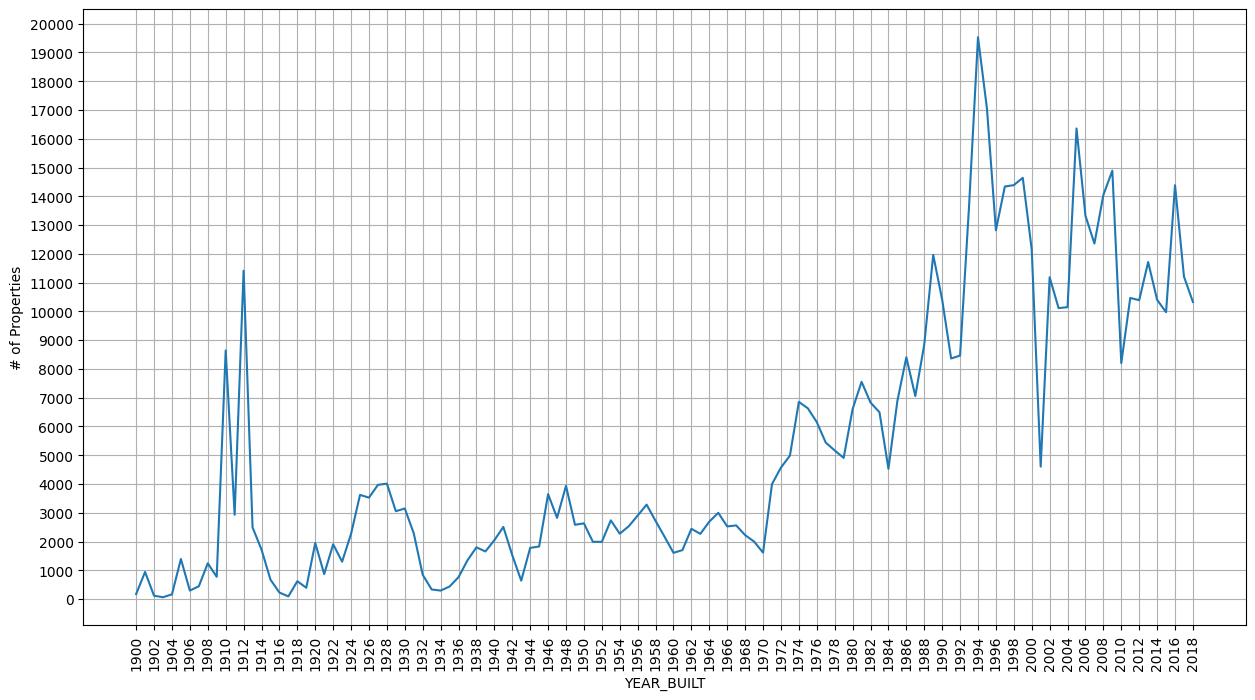

In [22]:
# --- Write your code below ---
year_built_count = df.groupby('YEAR_BUILT').size().reset_index(name='count').apply(lambda x: x).astype(int)

# sns.set(rc={'figure.figsize':(8, 5)})
with plt.rc_context({'figure.figsize': (15,8)}):
	ax = sns.lineplot(data=year_built_count[year_built_count['YEAR_BUILT'].between(1900, 2018)], x='YEAR_BUILT', y='count')
	ax.set(ylabel='# of Properties')
	ax.set_xticks(range(1900, 2020, 2))
	ax.set_yticks(range(0, 20500, 1000))
	ax.set_xticklabels(ax.get_xticks(), rotation = 90)
	plt.grid()
	plt.show()

Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. Vancouver had a steep increase in number of preoperties between the year 1992 and 1994, which has been the largest increase across years.
2. The number of properties built in 2001 fell below the average (a steep decrease) which matched the average number of properties built in 1970s and 1980s.

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2021, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

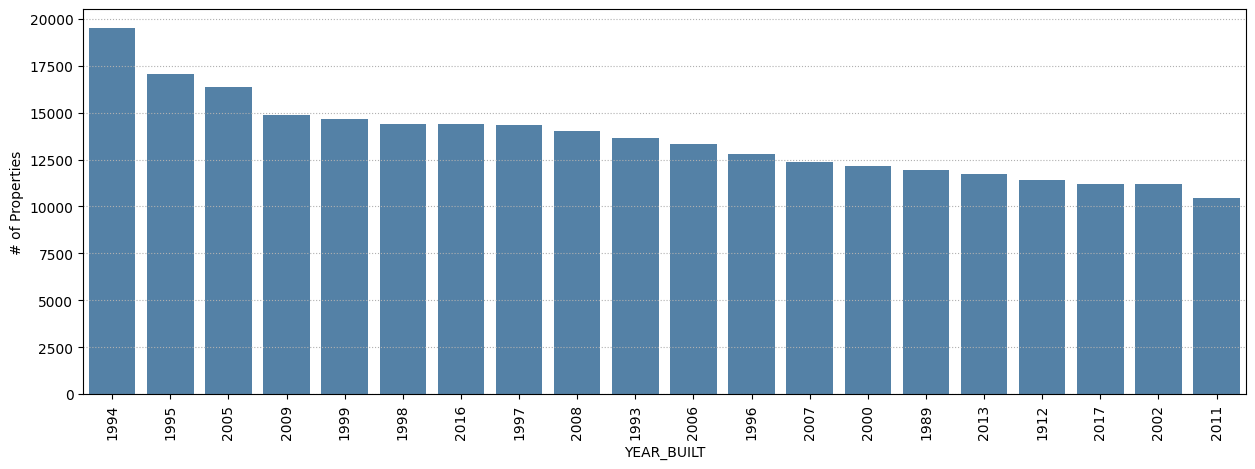

In [23]:
# --- Write your code below ---
top_20_years = year_built_count.sort_values(by='count', ascending=False).head(20)
top_20_years['YEAR_BUILT'] = top_20_years['YEAR_BUILT'].astype(str)
top_20_years = top_20_years.sort_values('count', ascending=False)

with plt.rc_context({'figure.figsize': (15, 5)}):
	ax = sns.barplot(data=top_20_years, x='YEAR_BUILT', y='count', color='steelblue')
	ax.xaxis.set_tick_params(labelrotation=90)
	ax.set(ylabel='# of Properties')
	plt.grid(axis='y', linestyle=':')
	plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Year 1994 and 1995 had the most number of properties built when compared to other years
2. Years 2011 had around 10500 properties built, which is lowest among all the years

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1990 and 2020? Please plot a histogram to answer this question.

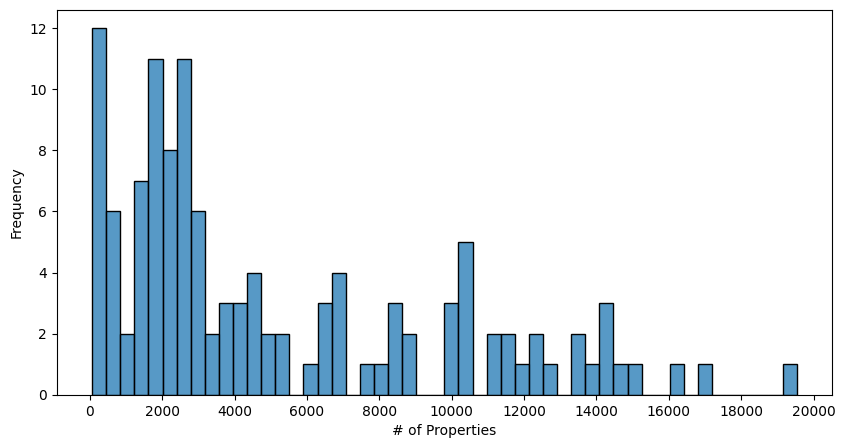

In [24]:
# --- Write your code below ---
with plt.rc_context({'figure.figsize': (10,5)}):
	ax = sns.histplot(data=year_built_count[year_built_count['YEAR_BUILT'].between(1900, 2020)], x='count', bins=50)
	ax.set(ylabel='Frequency', xlabel='# of Properties')
	ax.set_xticks(range(0, 22000, 2000))
	plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The ditribution is left skewed showing the average number of properties built between the year 1900 and 2020 is more close to the cheaper side.
2. Many years between 1900 and 2020 had properties built in the range of 0 and 5000

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

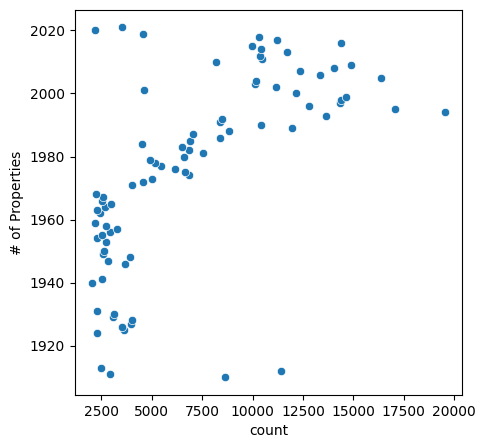

In [25]:
with plt.rc_context({'figure.figsize': (5,5)}):
	ax = sns.scatterplot(data=year_built_count[year_built_count['count'] > 2000], x="count", y="YEAR_BUILT")
	ax.set(ylabel='# of Properties')
	plt.show()


Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. There was a steep increase from year 1920 to 19960
2. After 1960, the growth show us a steady increase

### Step 8. Obtain geographic coordinates for Canadian postal codes

The property data carries Canadian postal codes, but latitude/longitude coordinates would be much more useful. Unfortunately, geolocations of Canadian postal codes are protected by copyright and the information has to be purchased. Fortunately, you already paid for it with your tuition...

Statistics Canada has a protected dataset, the postal code conversion file, which is available to SFU students via the Abacus Dataverse. Please follow these steps:
* Have a valid SFU account (not sure if alumni account would work)
* Connect to the Abacus Data Network via https://databases.lib.sfu.ca/record/61245148090003610/Abacus-Data-Network
* Connecting via the above link should show you as logged in user at https://abacus-library-ubc-ca.proxy.lib.sfu.ca/
* Search for: **Postal Code Conversion File May 2021**
* Download files: **pccfNat_fccpNat_052021.txt** and the [2021 PCCF Guide .pdf](https://abacus.library.ubc.ca/file.xhtml?persistentId=hdl:11272.1/AB2/9J8YUH/WJHERN&version=1.0) and place them in the same folder as this notebook.

#### Details about the dataset in the 2021 PCCF Guide
* Description of available fields for each postal code, see Content section, pp. 9
* Offsets and Size of fields to extract from lines in Postal Code Conversion File, Table 4.1, p. 11. 
 This is also included along with this notebook as **pccf_record_layout.csv**

In [26]:
rldf = pd.read_csv('pccf_record_layout.csv')
# load the raw text pccf file
with open('pccfNat_fccpNat_052021.txt','r', encoding='latin-1') as fh:
 pctxt = fh.read()
pclines = pctxt.split('\n')
pclines = list(filter(lambda l: len(l), pclines)) # keep only non-empty lines
displaymd(f"Number of lines in PCCF: {len(pclines):,}")

Number of lines in PCCF: 1,742,403

The following extraction of substrings works, but is *very slow*. Please use [pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) to make this faster. 
**TODO** write your improved code here.

In [27]:
# TODO: rewrite this function to make it run in about a minute (or just maybe 17 sec)
def gen_pccf():
 pc_lines = pd.Series(pclines, dtype="string")
 for idx, r in rldf.iterrows():
      print(idx, r['Field name'])
      yield r['Field name'], pc_lines.str.slice(r['Position'] - 1, r['Position'] + r['Size'] - 1)
pccf_df = pd.DataFrame(dict(gen_pccf()))

0 Postal code
1 FSA
2 PR
3 CDuid
4 CSDuid
5 CSDname
6 CSDtype
7 CCScode
8 SAC
9 SACtype
10 CTname
11 ER
12 DPL
13 FED13uid
14 POP_CNTR_RA
15 POP_CNTR_RA_type
16 DAuid
17 Dissemination block
18 Rep_Pt_Type
19 LAT
20 LONG
21 SLI
22 PCtype
23 Comm_Name
24 DMT
25 H_DMT
26 Birth_Date
27 Ret_Date
28 PO
29 QI
30 Source
31 POP_CNTR_RA_SIZE_CLASS


In [28]:
pccf_df['LAT'] = pccf_df['LAT'].astype(float)
pccf_df['LONG'] = pccf_df['LONG'].astype(float)
pccf_short = pccf_df[['Postal code', 'LONG', 'LAT', 'CSDname']]
pccf_short = pccf_short.groupby('Postal code').agg({'LONG':'mean','LAT':'mean','CSDname':'first'})

Phew, that was tedious! But now we're ready to merge geolocation to our property data.

In [29]:
df['Postal code'] = df['PROPERTY_POSTAL_CODE'].str.replace(' ','')
dfgeo = df.merge(pccf_short, on='Postal code')

49.1830995


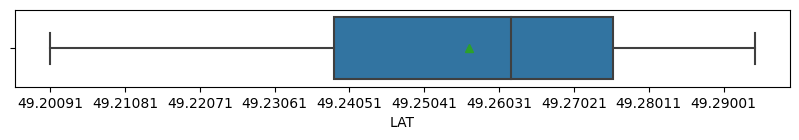

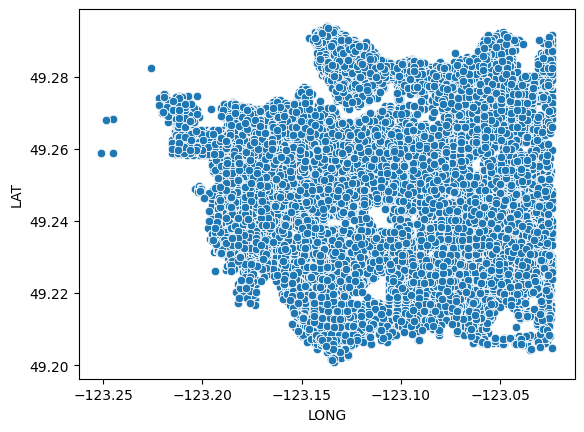

In [30]:
Q1 = dfgeo['LAT'].quantile(0.25)
Q3 = dfgeo['LAT'].quantile(0.75)
IQR = Q3 - Q1
cutoff = Q1-(1.5*IQR)
print(cutoff)

with plt.rc_context({'figure.figsize': (10,1)}):
	ax = sns.boxplot(x=dfgeo['LAT'], showmeans=True)
	ax.set_xticks(np.arange(dfgeo['LAT'].min(), dfgeo['LAT'].max(), 0.0099))
	plt.show()

sns.scatterplot(data=dfgeo, x='LONG', y='LAT')
plt.show()

In [31]:
# TODO remove the properties that are further north, outside Vancouver proper.
# Use a suitable visualiation to decide the right cutoff.

# --- write your code here ---
dfgeo_van = dfgeo

## There are no outliers to remove

Feel free to use the function below to prepare a heatmap of averages. The code is based on [Matthew McGonagle's blog post](https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins).

In [32]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    return means

**TODO** plot a heatmap of average current property prices, within the same geographic area

Note that the colormap may be useless due to a few extreme values. Rather than removing them as 'outliers', please just map the values before drawing with a suitable choice of logarithm.

/Users/darshaunkg/Documents/SFU/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/fy/2lk8vgcn66v3jnyppg9c75xc0000gn/T/ipykernel_65480/407323472.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)


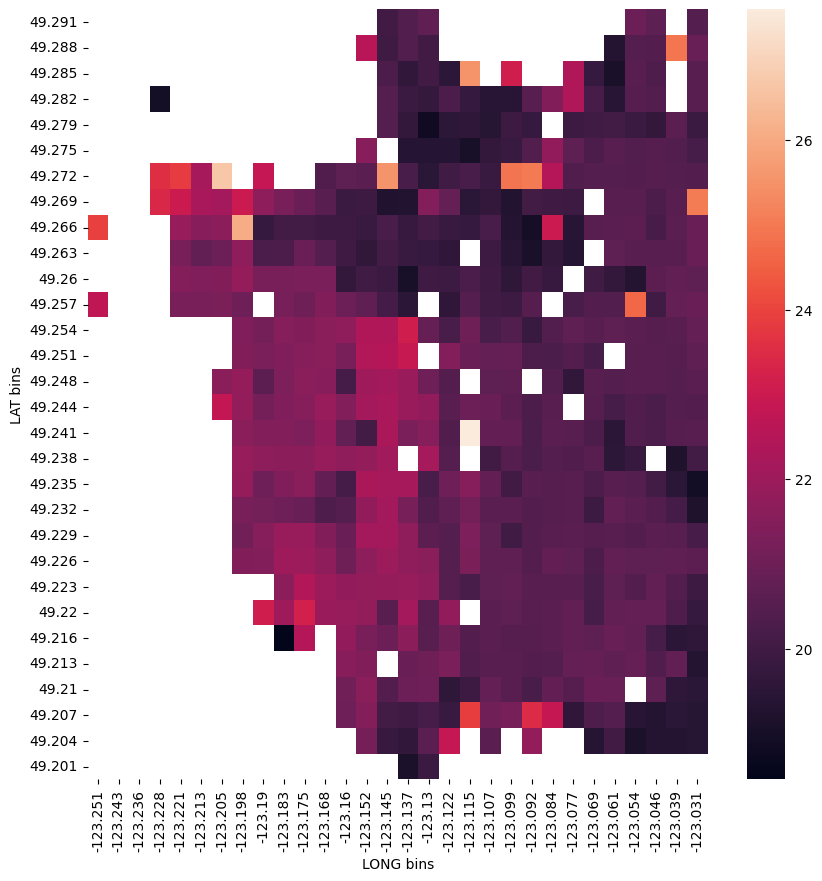

In [33]:
field = 'CURRENT_PRICE'
with plt.rc_context({'figure.figsize': (10,10)}):
    # TODO -- write your code here ---
	dfgeo_van['log_current_price'] = np.log2(dfgeo_van[field])
	means = heatmap_bins(dfgeo_van, ['LONG', 'LAT'])
	ax = sns.heatmap(means['log_current_price'], xticklabels = means['log_current_price'].columns.map(lambda x : x.left),
                        yticklabels = means['log_current_price'].index.map(lambda x : x.left))
	plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The North Vancouver shows a general trend of being comparatively costly.
2. The Sout-West Vancouver seems to be comparatively cheaper.


### Task 9: Integrate with BC Assessment data

BC Assessment is a governmental institution that provides valuation estimates for real-estate properties, so-called folios, around British Columbia.

SFU Library recently obtained access to the BCA Advice data, subject to conditions laid out in their End-user license agreement (EULA), for instance:
* free for research and classroom use only
* publication of results only with BCA consent (i.e. no public github repo with data or results)
* follow further criteria listed in the EULA.

In order to use the dataset we prepared, you have to agree to the [EULA](https://1sfu.sharepoint.com/:w:/r/teams/CMPT733-BigData2023-SFUTeams2/Shared%20Documents/General/Document.docx?d=w61f9f5754582479a99e06393611ff4d4&csf=1&web=1&e=o31Aaz) provided by BCA.

**Please follow the steps in the [BCA EULA sigsheet](https://1sfu.sharepoint.com/:x:/r/teams/CMPT733-BigData2023-SFUTeams2/Shared%20Documents/General/BCA%20EULA%20sigsheet.xlsx?d=wa24cef1803814ac3bbd4a49e990eaa75&csf=1&web=1&e=crtkgT) to obtain the dataset.**

In [34]:
# Load the dataset

bcadf = pd.read_csv('bca-data/sales-residential-2022-cleaned.csv')

/var/folders/fy/2lk8vgcn66v3jnyppg9c75xc0000gn/T/ipykernel_65480/633965471.py:3: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  bcadf = pd.read_csv('bca-data/sales-residential-2022-cleaned.csv')


#### 9.a Add latitude and longitude info

**TODO:** Obtain geographic coordinates for Canadian postal codes and merge them with existing dataframe

Use the `pccf_df` that you made before and join it with the bca data. Ensure that you get latitude and longitude, as well as, CSDname of the city or community for each folioID.


In [35]:
# TODO write your code here
bcadf['postalCode'] = bcadf['postalCode'].apply(lambda x: ''.join(x.split(' ')))

pccf_bca_df = bcadf.merge(pccf_df, left_on='postalCode', right_on='Postal code')


#### 9.b Create a quantitative map of Vancouver properties

Use the CSDName and limit the dataset to foloID's for `Vancouver` only. Then  perform the following:

Create a plot of `conveyancePrice` on a map. You can either draw individual color coded points or construct a heatmap using code from before.

/var/folders/fy/2lk8vgcn66v3jnyppg9c75xc0000gn/T/ipykernel_65480/3466652001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  van_df['log_conveyancePrice'] = np.log(van_df['conveyancePrice'])
/var/folders/fy/2lk8vgcn66v3jnyppg9c75xc0000gn/T/ipykernel_65480/407323472.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)


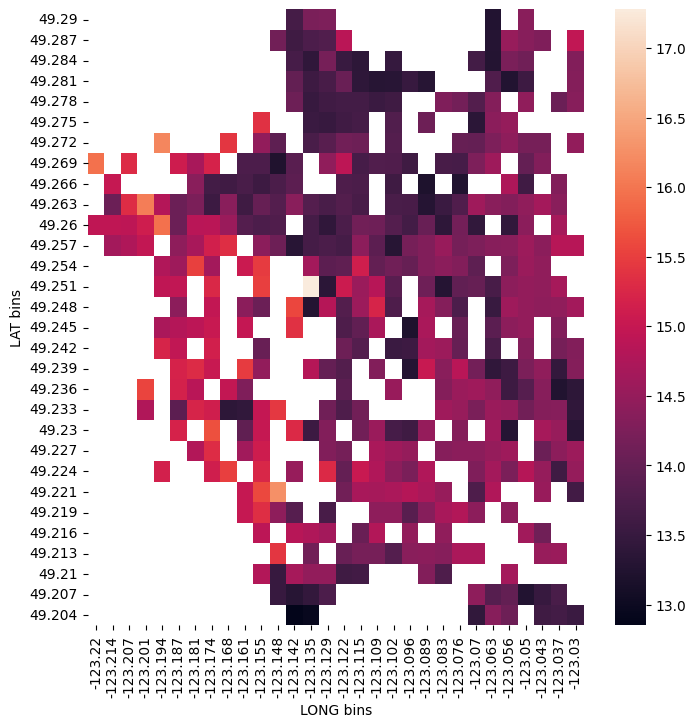

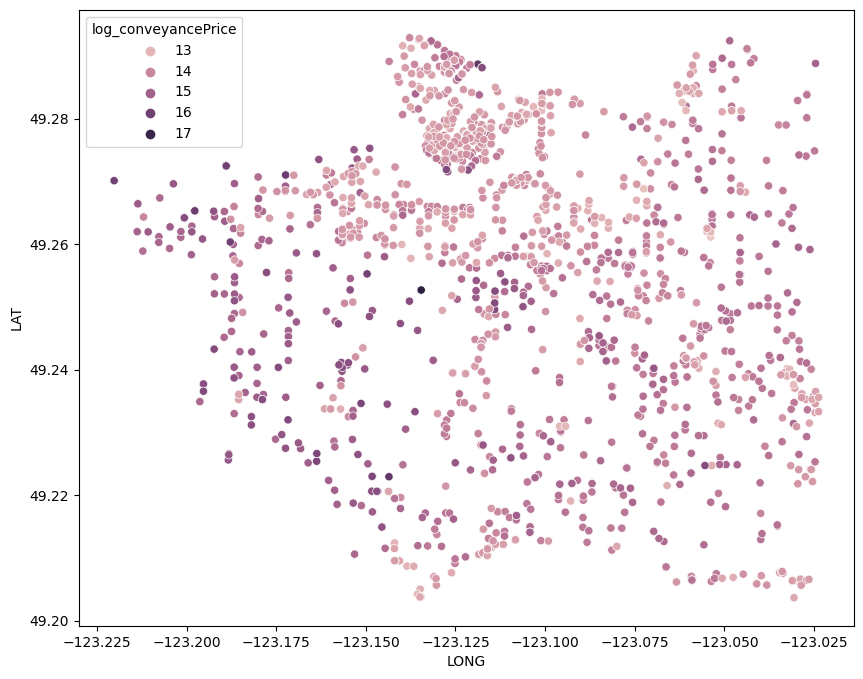

In [36]:
van_df = pccf_bca_df[pccf_bca_df['CSDname'].str.strip() == 'Vancouver']


van_df['log_conveyancePrice'] = np.log(van_df['conveyancePrice'])
means = heatmap_bins(van_df, ['LONG', 'LAT'])
with plt.rc_context({'figure.figsize': (8,8)}):
	sns.heatmap(means['log_conveyancePrice'], xticklabels = means['log_conveyancePrice'].columns.map(lambda x : x.left),
                        yticklabels = means['log_conveyancePrice'].index.map(lambda x : x.left))
	plt.show()

with plt.rc_context({'figure.figsize': (10,8)}):
	sns.scatterplot(data=van_df, x='LONG', y='LAT', hue='log_conveyancePrice')
	plt.show()

#### 9.c Create one or multiple plots to explore possible relationships between other quantitative variables and conveyancePrice

For this question, please use the entire dataset.

1. Create a plot that shows how `conveyancePrice` relates to two (or more) other quantitative variables. We are hoping to use this plot to think about possible modeling choices for price predictions.

In [38]:
# TODO write your code
van_df_corr = van_df[['conveyanceDate', 'conveyancePrice', 'conveyanceType', 
	'area', 'jurisdiction', 'roll_number', 
	'MB_year_built', 'MB_effective_year', 'MB_total_finished_area', 
	'MB_num_storeys', 'num_full_baths', 'num_3-piece_baths',
	'num_2-piece_baths', 'num_bedrooms', 'num_dens',
	'num_multi_garage', 'num_single_garage', 'num_carport',
	'land_width', 'land_depth', 'land_sq_measure',
	'land_area', 'inc_unit_of_measure_value', 'inc_floor_num',
	'inc_effective_year', 'basement_finish_area', 'basement_total_area',
	'deck_sq_footage', 'deck_sq_footage_covered', 'fireplace_num_1',
	'fireplace_num_2', 'first_floor_area', 'second_floor_area',
	'third_floor_area', 'school_district', 'LAT', 'LONG']] \
	.fillna(0).corr().style.background_gradient(cmap="Blues")

print(display(van_df_corr))

with plt.rc_context({'figure.figsize': (3,3)}):
	sns.lmplot(data=van_df, x='MB_total_finished_area', y='conveyancePrice')
	sns.lmplot(data=van_df, x='MB_num_storeys', y='conveyancePrice')
	sns.lmplot(data=van_df, x='num_full_baths', y='conveyancePrice')
	sns.lmplot(data=van_df, x='num_bedrooms', y='conveyancePrice')
	sns.lmplot(data=van_df, x='land_width', y='conveyancePrice')
	sns.lmplot(data=van_df, x='land_depth', y='conveyancePrice')
	sns.lmplot(data=van_df, x='land_sq_measure', y='conveyancePrice')
	sns.lmplot(data=van_df, x='inc_effective_year', y='conveyancePrice')
	sns.lmplot(data=van_df, x='basement_finish_area', y='conveyancePrice')
	sns.lmplot(data=van_df, x='basement_total_area', y='conveyancePrice')
	sns.lmplot(data=van_df, x='first_floor_area', y='conveyancePrice')
	sns.lmplot(data=van_df, x='second_floor_area', y='conveyancePrice')
	sns.lmplot(data=van_df, x='fireplace_num_1', y='conveyancePrice')
	sns.lmplot(data=van_df, x='num_multi_garage', y='conveyancePrice')

	plt.show()

/var/folders/fy/2lk8vgcn66v3jnyppg9c75xc0000gn/T/ipykernel_65480/2898368431.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .fillna(0).corr().style.background_gradient(cmap="Blues")


,conveyancePrice,conveyanceType,area,jurisdiction,MB_year_built,MB_effective_year,MB_total_finished_area,MB_num_storeys,num_full_baths,num_3-piece_baths,num_2-piece_baths,num_bedrooms,num_dens,num_multi_garage,num_single_garage,num_carport,land_width,land_depth,land_sq_measure,land_area,inc_unit_of_measure_value,inc_floor_num,inc_effective_year,basement_finish_area,basement_total_area,deck_sq_footage,deck_sq_footage_covered,fireplace_num_1,fireplace_num_2,first_floor_area,second_floor_area,third_floor_area,school_district,LAT,LONG
conveyancePrice,1.000000,0.018475,-0.032528,0.033517,-0.150518,-0.092903,0.810638,0.618730,0.489182,0.370041,0.466844,0.561861,-0.099433,0.483881,0.215309,0.154961,0.688178,0.631646,0.711185,0.055254,-0.320010,-0.215401,-0.592719,0.674062,0.681894,0.443767,0.425466,0.512182,0.073235,0.708307,0.628705,0.228752,0.065950,-0.085052,-0.203771
conveyanceType,0.018475,1.000000,0.000134,0.000231,-0.391047,-0.409409,-0.013049,0.003797,-0.010317,-0.027273,0.003085,-0.014290,0.002555,0.002544,0.001878,0.001199,0.031538,0.037418,0.032033,0.000268,-0.037228,-0.027978,-0.031998,0.003544,0.003586,-0.031191,0.001880,-0.020859,0.000379,0.003690,0.002398,0.000482,0.000063,-0.019220,0.007150
area,-0.032528,0.000134,1.000000,0.526560,-0.002597,-0.004377,-0.011365,-0.012596,-0.003000,-0.012525,0.020185,0.003203,0.030392,-0.008439,0.042819,-0.003976,-0.000372,-0.004487,-0.010217,-0.000888,-0.008106,0.004713,-0.001789,0.013568,-0.009757,0.012083,-0.006235,0.022360,-0.001256,0.000540,-0.037829,-0.001597,-0.625072,-0.008786,-0.003489
jurisdiction,0.033517,0.000231,0.526560,1.000000,0.006863,0.004334,0.021858,0.026465,-0.031997,-0.021639,0.005924,-0.027213,0.019501,-0.014581,0.027299,-0.006869,0.076458,0.031032,0.068008,-0.001533,-0.030052,-0.008861,-0.029498,-0.000661,0.037767,-0.003790,-0.010773,0.002971,-0.002170,0.040401,0.042247,-0.002760,0.332052,-0.030562,0.019452
MB_year_built,-0.150518,-0.391047,-0.002597,0.006863,1.000000,0.972490,-0.092979,-0.149304,0.003425,0.067455,-0.002469,-0.091211,0.138918,-0.034436,-0.161910,-0.094643,-0.254681,-0.265155,-0.234133,-0.026324,0.220686,0.154516,0.266790,-0.167321,-0.180427,-0.030716,-0.092662,-0.119232,-0.011323,-0.181103,-0.002350,0.005997,0.009784,0.028566,0.034209
MB_effective_year,-0.092903,-0.409409,-0.004377,0.004334,0.972490,1.000000,-0.021663,-0.052851,0.040294,0.076394,0.018622,-0.009748,0.115306,-0.006209,-0.093348,-0.075010,-0.164423,-0.170651,-0.150614,-0.027516,0.137016,0.106968,0.165329,-0.082428,-0.092297,0.000616,-0.026977,-0.071272,-0.003443,-0.094372,0.030693,0.013631,0.009480,0.027731,0.023852
MB_total_finished_area,0.810638,-0.013049,-0.011365,0.021858,-0.092979,-0.021663,1.000000,0.767488,0.690799,0.362204,0.520196,0.784656,-0.169439,0.592699,0.289457,0.141704,0.815157,0.779588,0.774223,0.179006,-0.451096,-0.356301,-0.745517,0.886647,0.882390,0.406390,0.533522,0.660415,0.162473,0.895047,0.750847,0.173607,0.031003,-0.225574,-0.047780
MB_num_storeys,0.618730,0.003797,-0.012596,0.026465,-0.149304,-0.052851,0.767488,1.000000,0.615593,0.300453,0.453818,0.751849,-0.240769,0.660465,0.372103,0.214886,0.866447,0.911018,0.752270,0.084052,-0.766975,-0.434849,-0.934064,0.746898,0.753037,0.273517,0.489835,0.564940,0.102864,0.845297,0.777181,0.249612,0.036723,-0.214615,0.054580
num_full_baths,0.489182,-0.010317,-0.003000,-0.031997,0.003425,0.040294,0.690799,0.615593,1.000000,0.002400,0.287638,0.682222,-0.164502,0.491924,0.198210,-0.009136,0.550834,0.584670,0.493444,0.068494,-0.394439,-0.279044,-0.573261,0.647732,0.627478,0.216587,0.389976,0.461584,0.118040,0.619486,0.612586,0.077824,-0.025817,-0.182632,0.046376
num_3-piece_baths,0.370041,-0.027273,-0.012525,-0.021639,0.067455,0.076394,0.362204,0.300453,0.002400,1.000000,0.158793,0.337729,0.038703,0.198590,0.079081,0.074092,0.242473,0.245196,0.219099,-0.025066,-0.062018,-0.081861,-0.230827,0.247921,0.238069,0.222040,0.164660,0.163456,-0.011166,0.261087,0.328145,0.214119,-0.005867,-0.102560,-0.025285


None


TypeError: lmplot() got an unexpected keyword argument 'ax'

### Optional Task 10: Further exploration (Bonus +0.25%)

If you do want to explore the spatial data of this assignment further, take a look at the material and tutorials of Geoff Boeing's [OSMnx](https://github.com/gboeing/osmnx). It can interface with the open street map API and pull further data, such as amenities, road network, basemap to add as background of a scatter plot, for instance.

In case you decide to work on this and would like to share your result, include a single page (or short) PDF that contains a plot and brief paragraph explaining it. Quality outcomes, we may showcase some of these works in class.

## Submission

You need to complete the first part by filling out this notebook. Please submit <font color="blue">A3.ipynb</font> to the CourSys activity [Assignment 3](https://courses.cs.sfu.ca/2022sp-cmpt-733-g1/+a3/). 